# Contours

### Import the necessary packages

In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

### Load the image, convert it to grayscale, and blur it slightly

Text(0.5,1,'Original')

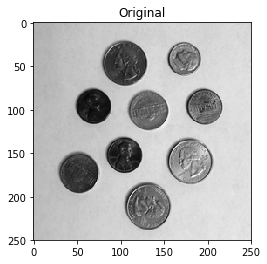

In [2]:
image = cv2.imread("images/image3.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (11, 11), 0)

plt.imshow(gray, cmap='gray')
plt.title("Original")

### The first thing we are going to do is apply edge detection to the image to reveal the outlines of the coins

Text(0.5,1,'Edges')

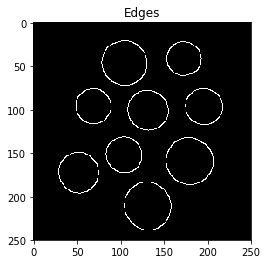

In [3]:
edged = cv2.Canny(blurred, 30, 150)

plt.imshow(edged, cmap='gray')
plt.title("Edges")

Find contours in the edged image. 

NOTE: The cv2.findContours method is DESTRUCTIVE to the image you pass in. 

If you intend on reusing your edged image, be sure to copy it before calling cv2.findContours

In [4]:
(_, cnts, _) = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

### How many contours did we find?

In [5]:
print("I count {} coins in this image".format(len(cnts)))

I count 9 coins in this image


### Let's highlight the coins in the original image by drawing a green circle around them

Text(0.5,1,'Coins')

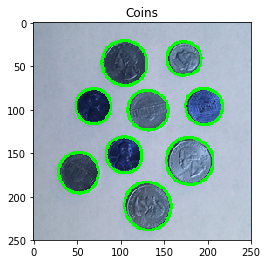

In [6]:
coins = image.copy()
cv2.drawContours(coins, cnts, -1, (0, 255, 0), 2)

plt.imshow(coins, cmap='gray')
plt.title("Coins")

### Now, let's loop over each contour and store it in a Tuple

In [7]:
coinsTuple = ()
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
for (i, c) in enumerate(cnts):
    # We can compute the 'bounding box' for each contour, which is the rectangle that encloses the contour
    (x, y, w, h) = cv2.boundingRect(c)

    # Now that we have the contour, let's extract it using array slices
    coin = image[y:y + h, x:x + w]

    # Just for fun, let's construct a mask for the coin by finding The minumum enclosing circle of the contour
    mask = np.zeros(image.shape[:2], dtype = "uint8")
    ((centerX, centerY), radius) = cv2.minEnclosingCircle(c)
    cv2.circle(mask, (int(centerX), int(centerY)), int(radius), 255, -1)
    mask = mask[y:y + h, x:x + w]
    coinsTuple += (cv2.bitwise_and(coin, coin, mask = mask),)

### Print the Tuple (Coins)

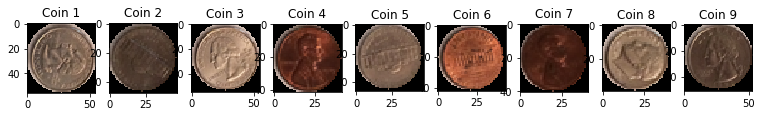

In [8]:
f, ax = plt.subplots(1, len(coinsTuple), figsize=(13,5))

for i in range(len(ax)):
    ax[i].set_title("Coin " + str(i+1))
    ax[i].imshow(coinsTuple[i])